<a href="https://colab.research.google.com/github/usama-2810/Clustering-and-Fitting/blob/main/alcohol_and_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

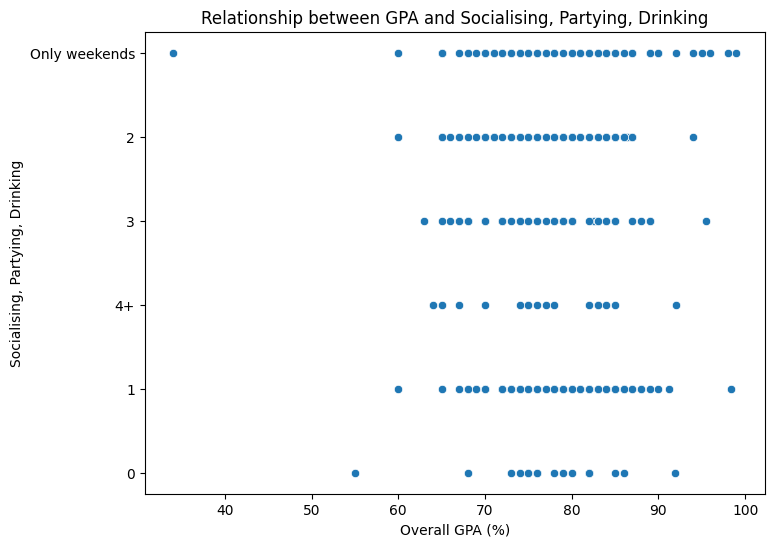

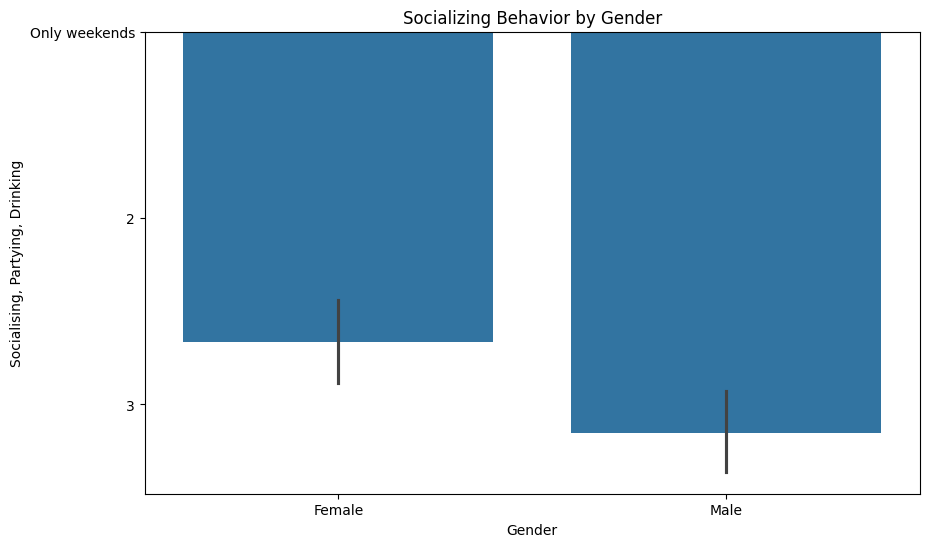

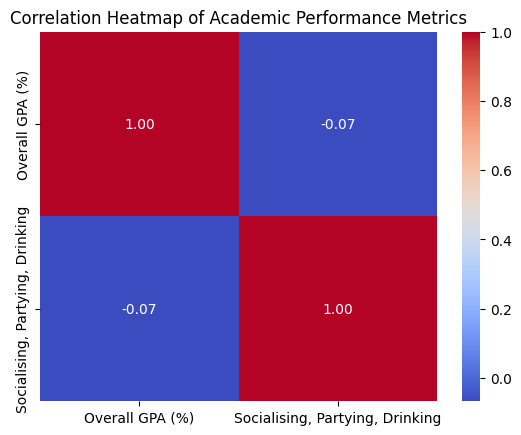

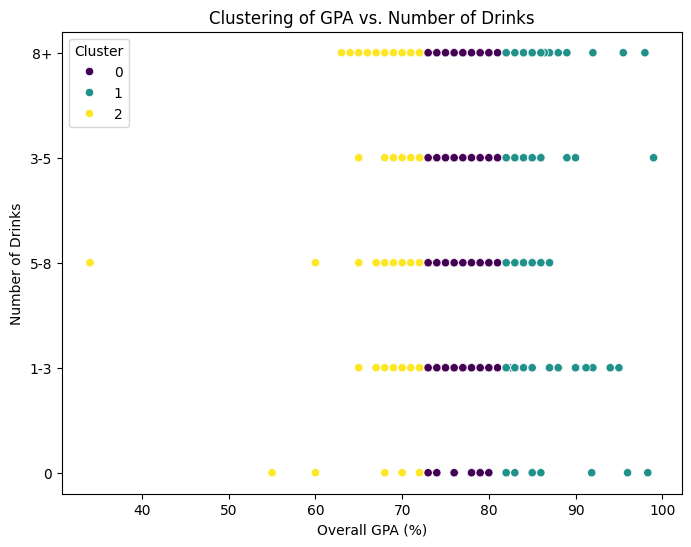

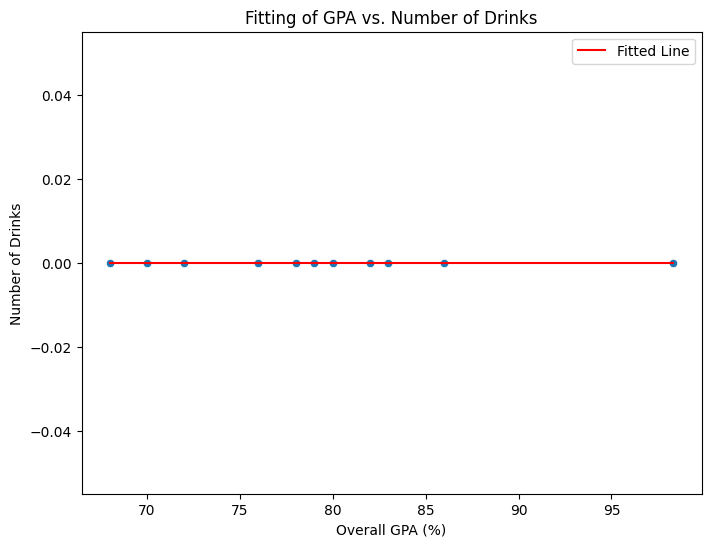

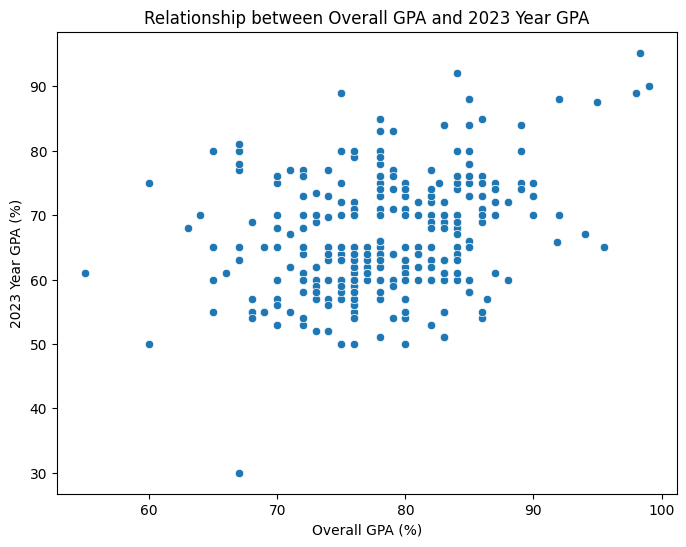

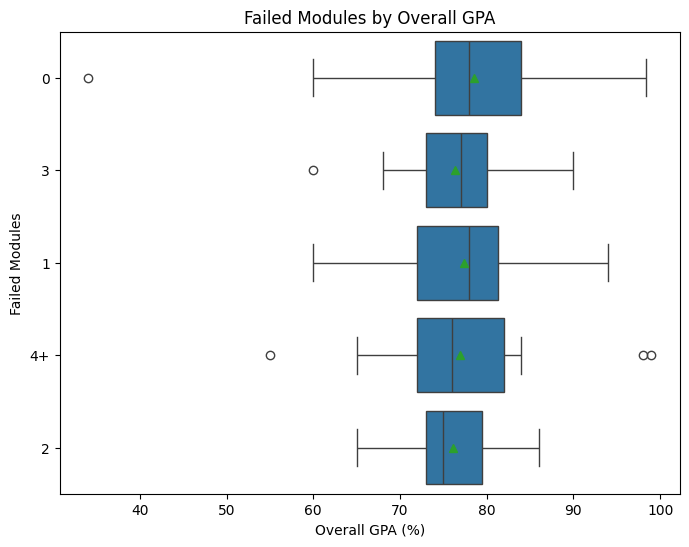

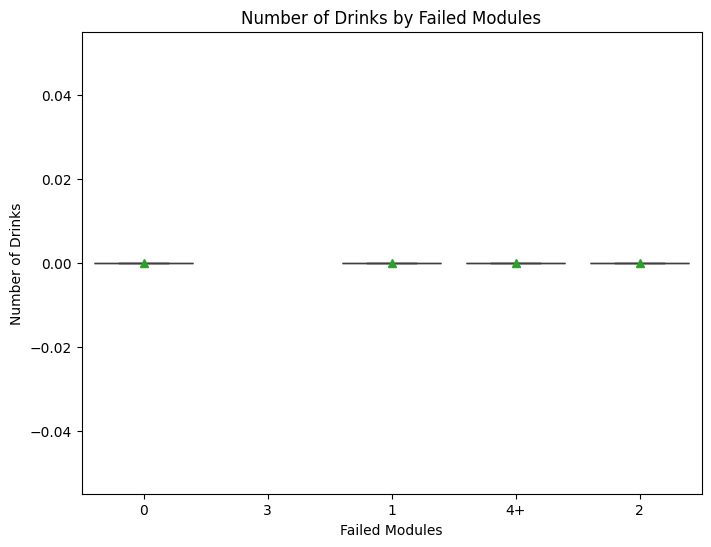

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# Load dataset from Google Drive
data_url = 'https://drive.google.com/file/d/1emYrOf_zNK2rpiQO4UPPO122m5PqN-1n/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + data_url.split('/')[-2]
df = pd.read_csv(path)

# Rename columns for clarity
new_cols = {
    df.columns[1]: "Gender",
    df.columns[2]: "Overall GPA (%)",
    df.columns[3]: "Year",
    df.columns[4]: "Faculty",
    df.columns[5]: "2023 Year GPA (%)",
    df.columns[6]: "Accommodation 2023",
    df.columns[10]: "Socialising, Partying, Drinking",
    df.columns[11]: "Number of Drinks",
    df.columns[12]: "Skipped Classes Because of Alcohol",
    df.columns[13]: "Failed Modules",
    df.columns[14]: "Relationship"
}
df.rename(columns=new_cols, inplace=True)

# Drop irrelevant columns if needed
# df = df.drop(['Column1', 'Column2'], axis=1)
def plot_relational_graph(df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Overall GPA (%)', y='Socialising, Partying, Drinking', data=df)
    plt.title('Relationship between GPA and Socialising, Partying, Drinking')
    plt.xlabel('Overall GPA (%)')
    plt.ylabel('Socialising, Partying, Drinking')
    plt.show()

def plot_categorical_graph(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Gender', y='Socialising, Partying, Drinking', data=df)
    plt.title('Socializing Behavior by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Socialising, Partying, Drinking')
    plt.show()

def plot_statistical_graph(df):
    # Select relevant numeric columns for correlation analysis
    numeric_cols = ['Overall GPA (%)', 'Socialising, Partying, Drinking']

    # Convert selected columns to numeric type (ignore errors for non-convertible values)
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Filter the DataFrame to include only numeric columns (exclude non-convertible values)
    df_numeric = df[numeric_cols].dropna()

    # Compute the correlation matrix
    corr_matrix = df_numeric.corr()

    # Plot the correlation heatmap
    # plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Academic Performance Metrics')
    plt.show()



def perform_clustering(df, n_clusters=3):
    # Select relevant numeric features for clustering
    features = ['Overall GPA (%)', 'Number of Drinks']

    # Filter out non-numeric values from the selected features
    numeric_cols = [col for col in features if df[col].dtype in ['int64', 'float64']]

    # Extract numeric features and handle missing values with mean imputation
    X = df[numeric_cols].copy()
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Perform clustering with KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_imputed)

    return df

def plot_clustered_graph(df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Overall GPA (%)', y='Number of Drinks', hue='Cluster', data=df, palette='viridis')
    plt.title('Clustering of GPA vs. Number of Drinks')
    plt.xlabel('Overall GPA (%)')
    plt.ylabel('Number of Drinks')
    plt.legend(title='Cluster')
    plt.show()


def perform_fitting(df):
    # Replace non-numeric values with NaN in the 'Number of Drinks' column
    df['Number of Drinks'] = pd.to_numeric(df['Number of Drinks'], errors='coerce')

    # Drop rows with NaN values
    df_cleaned = df.dropna()

    # Select relevant features for fitting
    X = df_cleaned[['Overall GPA (%)']].copy()
    y = df_cleaned['Number of Drinks']

    # Fit LinearRegression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict using the fitted model
    df_cleaned['Predicted Drinks'] = model.predict(X)

    return df_cleaned


def plot_fitting_graph(df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Overall GPA (%)', y='Number of Drinks', data=df)
    sns.lineplot(x='Overall GPA (%)', y='Predicted Drinks', data=df, color='red', label='Fitted Line')
    plt.title('Fitting of GPA vs. Number of Drinks')
    plt.xlabel('Overall GPA (%)')
    plt.ylabel('Number of Drinks')
    plt.legend()
    plt.show()
def explore_additional_relationships(df):
  # Explore GPA relationships
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='Overall GPA (%)', y='2023 Year GPA (%)', data=df)
  plt.title('Relationship between Overall GPA and 2023 Year GPA')
  plt.xlabel('Overall GPA (%)')
  plt.ylabel('2023 Year GPA (%)')
  plt.show()

  plt.figure(figsize=(8, 6))
  sns.boxplot(x='Overall GPA (%)', y='Failed Modules', data=df, showmeans=True)
  plt.title('Failed Modules by Overall GPA')
  plt.xlabel('Overall GPA (%)')
  plt.ylabel('Failed Modules')
  plt.show()

  plt.figure(figsize=(8, 6))
  sns.boxplot(x='Failed Modules', y='Number of Drinks', data=df, showmeans=True)
  plt.title('Number of Drinks by Failed Modules')
  plt.xlabel('Failed Modules')
  plt.ylabel('Number of Drinks')
  plt.show()

# Perform data preprocessing and visualization
plot_relational_graph(df)
plot_categorical_graph(df)
plot_statistical_graph(df)

# Perform clustering
df_clustered = perform_clustering(df)
df_clustered = perform_clustering(df)
# print(df_clustered['Cluster'].value_counts())
plot_clustered_graph(df_clustered)

# Perform fitting
# Check if the result is not None and display the DataFrame
df_fitted = perform_fitting(df)
if df_fitted is not None:
    plot_fitting_graph(df_fitted)
else:
    print("No data available after filtering. Fitting failed.")


explore_additional_relationships(df)

